In [1]:
# This is an animation to stimulate the spikes of all channels, the changing of color represent if there is a pike
# at the location 

# import import import...
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import matplotlib.cm as cm
import matplotlib.colors as col
from electrode_positions import *
# import spike signal
from preprocess_data import *
import local_directories as ldir
import seaborn as sns
from electrode_positions import *
from segment_data import *
cmap = cm.seismic


data=np.zeros((512,1200000))

electrodes=np.arange(512)
for e in electrodes:
    data_electrode = np.load(ldir.DATA_PATH + str(e) + ".npy")
    data[e] = preprocess_data(data_electrode)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/signal/_arraytools.py:45: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  b = a[a_slice]


In [4]:
# get new data with top 20 % energy
data1=data[0]
wl=int(41)
max_fraction=0.3
min_fraction=0.1
filtered_data=segment_data(data1, wl, max_fraction, min_fraction, plot_res=True)





20.0


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


TypeError: 'float' object cannot be interpreted as an integer

(1200000,)

In [2]:
# roe_num/col_num is the convertion of the position of the electrodes into regular matrix, the matrix element
# replaced by its signal
electrode_array=np.array(ELECTRODE_ARRAY)

heat_map_data=np.zeros((16,32))
k=1

row_num=np.zeros(512,dtype=np.int)
col_num=np.zeros(512,dtype=np.int)
for i in range(512):
    row_num[i]=((electrode_array[i,1]+450)/60)
    
    row_num[i]=row_num[i].astype(int)
    if (row_num[i]%2)==0:
        col_num[i]=((electrode_array[i,0]+945)/60).astype(int)
    else:
        col_num[i]=((electrode_array[i,0]+915)/60).astype(int)


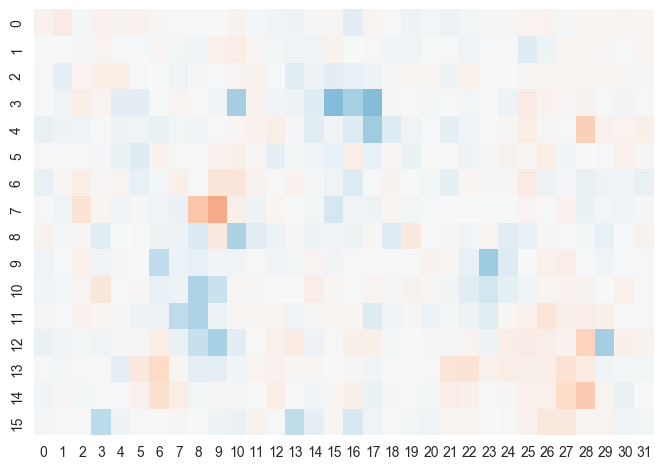

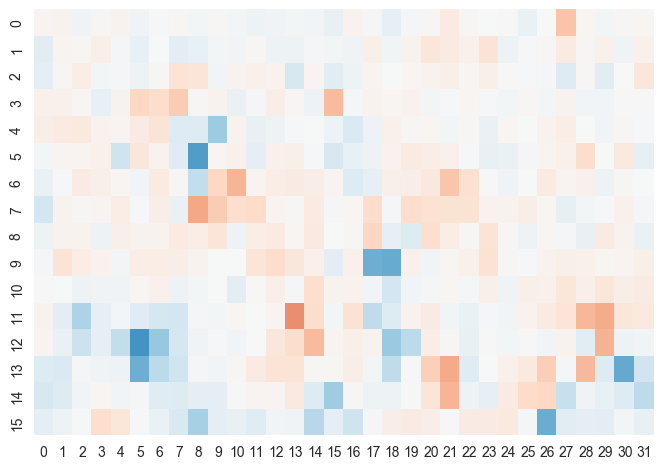

In [14]:
# Animation part

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()

ax = plt.axes(xlim=(-1000, 1000), ylim=(-500, 500))
line, = ax.plot([], [], lw=2)


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    #ax = sns.heatmap(np.ones((16,32)),vmin=-1,vmax=1)

    return line,

heatmap_data=np.zeros((16,32))
# animation function.  This is called sequentially
def animate(i):
    
    for k in range(512):
        
        heatmap_data[row_num[k],col_num[k]]=data[k,i]
    # normalize the whole data 
    ax = sns.heatmap(heatmap_data,vmin=-1,vmax=1,cbar=False)
    
    #ax.scatter(x, y, c=cmap(norm(rescaled_data_color[:,i]))) # <= Update the curve
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=200, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('animation.mp4', fps=3, extra_args=['-vcodec', 'libx264'])

plt.show()

In [404]:
# animation of a single point changing color 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import matplotlib.cm as cm
import matplotlib.colors as col
from electrode_positions import *

vmin=0
vmax=70

cmap = cm.viridis
norm = col.Normalize(vmin=vmin, vmax=vmax)

s=121

color = lambda i: cmap(i)


# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,


# animation function.  This is called sequentially
def animate(i):
    ax.scatter(1, 0.5, c=color(i), s=2*s, marker='^', alpha=.4) # <= Update the curve
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=256, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

23.0

In [385]:
# animation using scatter point 

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import matplotlib.cm as cm
import matplotlib.colors as col
from electrode_positions import *
rescaled_data_color=data*256/2.0
cmap = cm.seismic

x=electrode_array[:,0]
y=electrode_array[:,1]

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()

ax = plt.axes(xlim=(-1000, 1000), ylim=(-500, 500))
line, = ax.plot([], [], lw=2)

norm = col.Normalize(vmin=-1, vmax=1)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    ax.scatter(x, y, c=cmap(norm(rescaled_data_color[:,i]))) # <= Update the curve
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=200, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('animation.mp4', fps=2, extra_args=['-vcodec', 'libx264'])

plt.show()

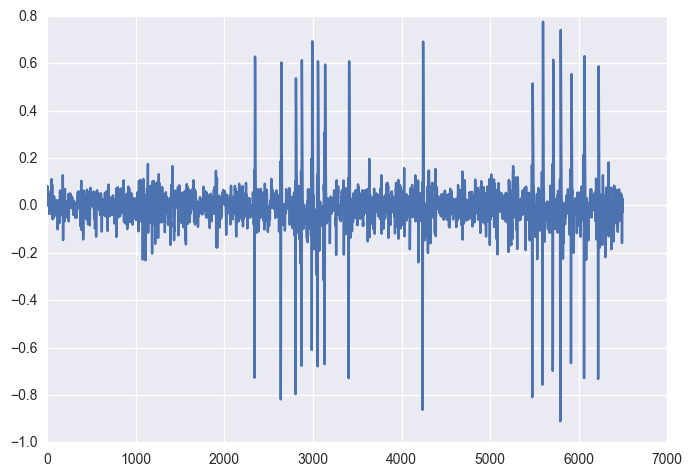

In [12]:
plt.plot(data[6,0:6500])
plt.show()